In [75]:
import pickle

# Load the training data 
pickle_in = open("x_train.pickle","rb")
x_train = pickle.load(pickle_in)

# print(x_train)
pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

# Load the test data 

pickle_in = open("x_test.pickle","rb")
x_test = pickle.load(pickle_in)


pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)




In [76]:
print(x_train)
print(x_train.shape)

print(y_train)
print(y_train.shape)

print(x_test)
print(x_test.shape)

print(y_test)
print(y_test.shape)

print(x_train.shape[1:])


      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
3607       1              0        0           0  0.169014             1   
1219       1              0        1           1  0.859155             1   
1383       1              0        0           0  0.000000             1   
5549       1              0        0           0  0.028169             1   
3778       0              0        0           0  0.028169             1   
...      ...            ...      ...         ...       ...           ...   
1342       1              0        0           0  0.098592             1   
4987       0              0        1           0  0.985915             1   
2105       1              0        0           0  0.028169             1   
6333       1              1        0           0  0.830986             1   
1486       1              0        0           0  0.014085             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
3607       

In [77]:
# The datasets are normalised and resized to the crt size

# Implement the model now !

# We are using CNN over ANN to reduce computations and to identify features quickly 


from tensorflow import keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten 

# To analyse the data , we use tensorboard 
from tensorflow.keras.callbacks import TensorBoard

# We are going to do convolution and max pooling 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import time 

# No of layers , node per layer , conv layer 

# import numpy as np

# x_train_array = np.array(x_train)
# x_train = x_train.reshape(-1,x_train.shape[0], x_train.shape[1],1)  # Replace height and width with the actual dimensions of your images

model = keras.Sequential([
    Dense(units = 40 , input_shape = (26,) ,activation = "relu"),
    Dense(units = 40,activation = "relu"),
    Dense(units = 20,activation = "relu"),

    Dense(units = 1,activation = "sigmoid"), #  binary classification - yes/no

])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),    
    optimizer=tf.keras.optimizers.Adam(0.001),metrics =["accuracy"], # Metric is what we want to measure 
)

model.fit(x_train,y_train,validation_split = 0.2,epochs = 14)

Epoch 1/14


/home/aniruth/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6352 - loss: 0.5971 - val_accuracy: 0.7858 - val_loss: 0.4425
Epoch 2/14
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.7991 - loss: 0.4234 - val_accuracy: 0.7920 - val_loss: 0.4429
Epoch 3/14
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.7900 - loss: 0.4295 - val_accuracy: 0.8036 - val_loss: 0.4324
Epoch 4/14
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.8066 - loss: 0.4052 - val_accuracy: 0.8062 - val_loss: 0.4267
Epoch 5/14
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.7980 - loss: 0.4107 - val_accuracy: 0.8009 - val_loss: 0.4264
Epoch 6/14
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.8122 - loss: 0.4058 - val_accuracy: 0.8062 - val_loss: 0.4263
Epoch 7/14
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.8144 - loss: 0.3928 - val_accuracy: 0.8080 - val_loss: 0.4263
Epoch 8/14
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.8096 - loss: 0.3944 - val_accuracy:

In [92]:
# evaluate the model

test_loss , test_acc = model.evaluate(x_test,y_test)

print(f"Accuracy is {test_acc*100}")
print(f"Loss is {test_loss}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.7913 - loss: 0.4379
Accuracy is 79.24662232398987
Loss is 0.44684383273124695


In [79]:
# predict the test 

y_pred = model.predict(x_test)
print(y_pred)

print(y_pred.shape)
print(len(y_pred))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0.04004225]
 [0.02860782]
 [0.3024723 ]
 ...
 [0.19483902]
 [0.747768  ]
 [0.8315885 ]]
(1407, 1)
1407


In [86]:
# Sigmoid - cut -off = 0.5

for i in range(len(y_pred)):
    if(y_pred[i]>=0.5):
        y_pred[i] = 1
    else:
        y_pred[i] = 0
        
print(type(y_pred))
# convert the floats to int
y_pred = y_pred.astype(int)


print(y_pred)
print(y_pred.shape)
print(y_pred.ndim)

# flatten it to make it 1D
y_pred = y_pred.flatten()
print(y_pred.shape)
print(y_pred.ndim)


# print(y_test)
print(y_test.shape)

print(y_test.ndim)

# print(y_test)

<class 'numpy.ndarray'>
[0 0 0 ... 0 1 1]
(1407,)
1
(1407,)
1
(1407,)
1


In [87]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 79.24662402274343


In [88]:
# Classification report

from sklearn.metrics import classification_report 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1044
           1       0.63      0.48      0.55       363

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

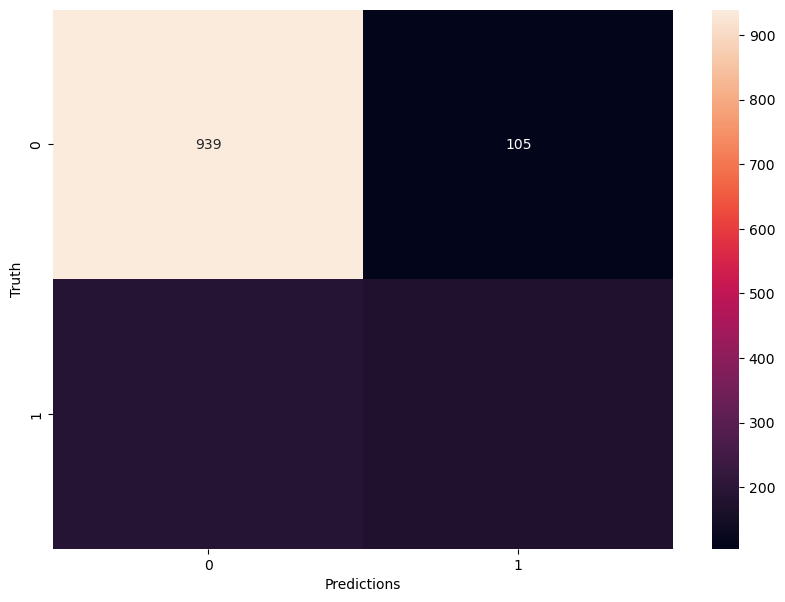

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from matplotlib import pyplot as plt

cm = tf.math.confusion_matrix(labels = y_test , predictions = y_pred)

plt.figure(figsize = (10,7))
 
sn.heatmap(cm , annot = True , fmt = "d") 

plt.xlabel("Predictions")
plt.ylabel("Truth")

# along diag = crt predictions !!
